In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = "C:/Users/apsam/Documents/work/Thiyaku work/blog_urban_growth"

csv_file = f"{data_dir}/cbe_extracted.csv"
model_path = f"{data_dir}/random_forest_model_cbe.pkl"

In [3]:
df = pd.read_csv(csv_file)

In [4]:
df = df.pivot_table(index=['Date', "x", "y", 'Land Use'], columns='Band', values='Value').reset_index()
df.columns.name = None

In [5]:
set(df["Land Use"])

{'barren_land', 'settelements', 'vegetation', 'water_bodies'}

In [6]:
df.head()

,Date,x,y,Land Use,B1,B10,B11,B12,B13,B2,B3,B4,B5,B6,B7,B8,B9
0,20230222T050821_20230222T052224_T43PGN,704595.0,1212545.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1,20230222T050821_20230222T052224_T43PGN,704595.0,1212555.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2,20230222T050821_20230222T052224_T43PGN,704595.0,1212565.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
3,20230222T050821_20230222T052224_T43PGN,704595.0,1212575.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
4,20230222T050821_20230222T052224_T43PGN,704595.0,1212585.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [7]:
#df = df[df["Land Use"] != "roads"]

In [8]:
df["Land Use"]

0         settelements
1         settelements
2         settelements
3         settelements
4         settelements
              ...     
258752     barren_land
258753     barren_land
258754     barren_land
258755     barren_land
258756     barren_land
Name: Land Use, Length: 258757, dtype: object

In [9]:
df = df.dropna()

In [23]:
# df = df[~np.isinf(df.B1_B3_ratio)]
# df.head()

In [24]:
# Relabel non-settlement classes as "other"
# df['Land Use'] = df['Land Use'].apply(lambda x: 'settelements' if x == 'settelements' else 'other')
# 

In [25]:
#df = df[~((df["Land Use"] == "settelements") & (df.B1 < 50) & (df.B2 < 50) & (df.B3 < 50))]

In [26]:
# filtered_data = df[df['Land Use'] == 'settelements']
# filtered_data.head(100)

In [10]:
df.head()

,Date,x,y,Land Use,B1,B10,B11,B12,B13,B2,B3,B4,B5,B6,B7,B8,B9
0,20230222T050821_20230222T052224_T43PGN,704595.0,1212545.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1,20230222T050821_20230222T052224_T43PGN,704595.0,1212555.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2,20230222T050821_20230222T052224_T43PGN,704595.0,1212565.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
3,20230222T050821_20230222T052224_T43PGN,704595.0,1212575.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
4,20230222T050821_20230222T052224_T43PGN,704595.0,1212585.0,settelements,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [11]:
# Preparing data for training
# Select features (B1, B2, B3) and target (Land Use)
X = df[['B1', 'B2', 'B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13']]
y = df['Land Use']

In [12]:
# # Encoding the target variable if necessary
# # y_encoded = pd.factorize(y)[0]  # Converts 'Land Use' to numerical labels
# y_encoded, class_labels = pd.factorize(df['Land Use'])

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# # Initializing and training the Random Forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# print(rf.classes_) # Shows the mapping of each numeric class to the original labels
# # Making predictions
# y_pred = rf.predict(X_test)

# # Evaluating the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, target_names=class_labels)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:\n", report)

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable if necessary
y_encoded, class_labels = pd.factorize(df['Land Use'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

### Random Forest with Hyperparameter Tuning ###
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

print(f"Best Random Forest Parameters: {rf_random.best_params_}")

# Making predictions
y_pred_rf = rf_random.predict(X_test)

# Evaluating Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=class_labels)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:\n", report_rf)

### XGBoost with Hyperparameter Tuning ###
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# RandomizedSearchCV for XGBoost
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

print(f"Best XGBoost Parameters: {xgb_random.best_params_}")

# Making predictions
y_pred_xgb = xgb_random.predict(X_test)

# Evaluating XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=class_labels)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:\n", report_xgb)

### CatBoost with Hyperparameter Tuning ###
catboost = CatBoostClassifier(random_state=42, silent=True)

# Hyperparameter grid for CatBoost
cat_param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# RandomizedSearchCV for CatBoost
cat_random = RandomizedSearchCV(estimator=catboost, param_distributions=cat_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
cat_random.fit(X_train, y_train)

print(f"Best CatBoost Parameters: {cat_random.best_params_}")

# Making predictions
y_pred_cat = cat_random.predict(X_test)

# Evaluating CatBoost
accuracy_cat = accuracy_score(y_test, y_pred_cat)
report_cat = classification_report(y_test, y_pred_cat, target_names=class_labels)

print(f"CatBoost Accuracy: {accuracy_cat}")
print("CatBoost Classification Report:\n", report_cat)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Random Forest Accuracy: 0.8085226979955686
Random Forest Classification Report:
               precision    recall  f1-score   support

settelements       1.00      0.68      0.81     31618
  vegetation       1.00      0.49      0.66      4953
 barren_land       0.71      1.00      0.83     35389
water_bodies       1.00      0.63      0.77      5668

    accuracy                           0.81     77628
   macro avg       0.92      0.70      0.77     77628
weighted avg       0.86      0.81      0.80     77628

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\apsam\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:21] WARNING: D:\bld\xgboost-split_1733179535861\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
XGBoost Accuracy: 0.809798011026949
XGBoost Classification Report:
               precision    recall  f1-score   support

settelements       1.00      0.68      0.81     31618
  vegetation       1.00      0.50      0.66      4953
 barren_land       0.71      1.00      0.83     35389
water_bodies       1.00      0.63      0.77      5668

    accuracy                           0.81     77628
   macro avg       0.93      0.70      0.77     77628
weighted avg       0.87      0.81      0.81     77628

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\apsam\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\apsam\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apsam\miniconda3\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\apsam\miniconda3\Lib\site-packages\catboost\core.py", li

Best CatBoost Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8}
CatBoost Accuracy: 0.8092312052352244
CatBoost Classification Report:
               precision    recall  f1-score   support

settelements       1.00      0.68      0.81     31618
  vegetation       1.00      0.50      0.66      4953
 barren_land       0.71      1.00      0.83     35389
water_bodies       1.00      0.63      0.77      5668

    accuracy                           0.81     77628
   macro avg       0.93      0.70      0.77     77628
weighted avg       0.86      0.81      0.80     77628



In [ ]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy_svc:.2f}')

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc, target_names=data.target_names))

In [126]:
import pickle

# Assuming rf is your trained Random Forest model
with open(model_path, "wb") as f:
    pickle.dump(rf, f)

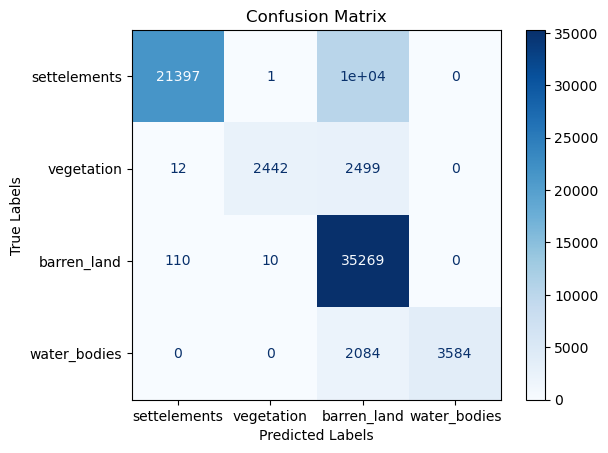

In [30]:
# Displaying the confusion matrix with actual labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

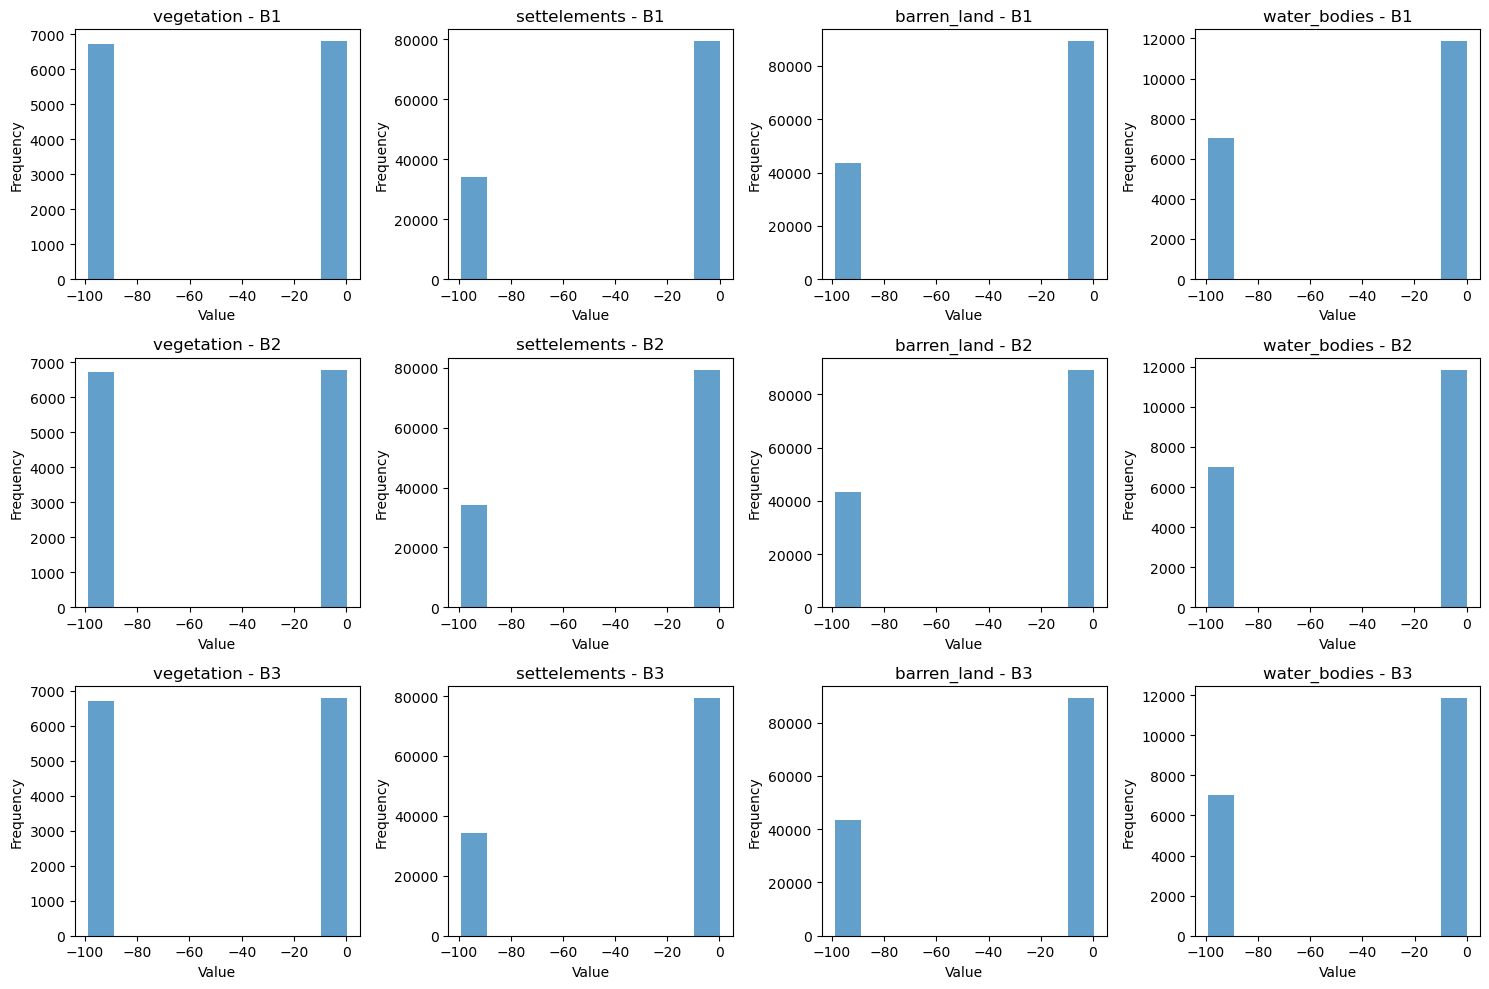

In [57]:
# Plotting histograms
# List of bands to plot
bands = ['B1', 'B2', 'B3']
land_uses = df['Land Use'].unique()

# Plotting histograms
plt.figure(figsize=(15, 10))

for i, band in enumerate(bands, 1):
    for j, land_use in enumerate(land_uses, 1):
        plt.subplot(len(bands), len(land_uses), (i - 1) * len(land_uses) + j)
        subset = df[df['Land Use'] == land_use]
        plt.hist(subset[band].dropna(), bins=10, alpha=0.7)
        plt.title(f'{land_use} - {band}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
y_encoded, class_labels = pd.factorize(df['Land Use'])
print(class_labels) 

Index(['vegetation', 'barren_land', 'water_bodies'], dtype='object')


In [37]:
in_file = "e:/Projects/personal/location_strategy/automation/KB homes/developer_builder_unique_dictionary.csv"

In [39]:
df = pd.read_csv(in_file)

In [44]:
df.Type = df["Type"].str.strip()

In [46]:
df.OwnerName = df["OwnerName"].str.strip()

In [47]:
df.to_csv(in_file, index=False)